# Analisis de componentes principales

- https://www.youtube.com/watch?v=AniiwysJ-2Y

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install seaborn

In [5]:
import seaborn as sns

In [6]:
dataset = load_breast_cancer()
X = dataset["data"]
y = dataset["target"]

In [29]:
tabla = pd.DataFrame(data=X, columns=dataset["feature_names"])
print(tabla.head())
print(tabla.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [14]:
print(tabla.columns)
tabla.describe()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


$$({X - \mu}) / {\sigma}$$

In [13]:
means = tabla.mean(axis=0)
print(means.shape)
stds = tabla.std(axis=0)
print(stds.shape)

(30,)
(30,)


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


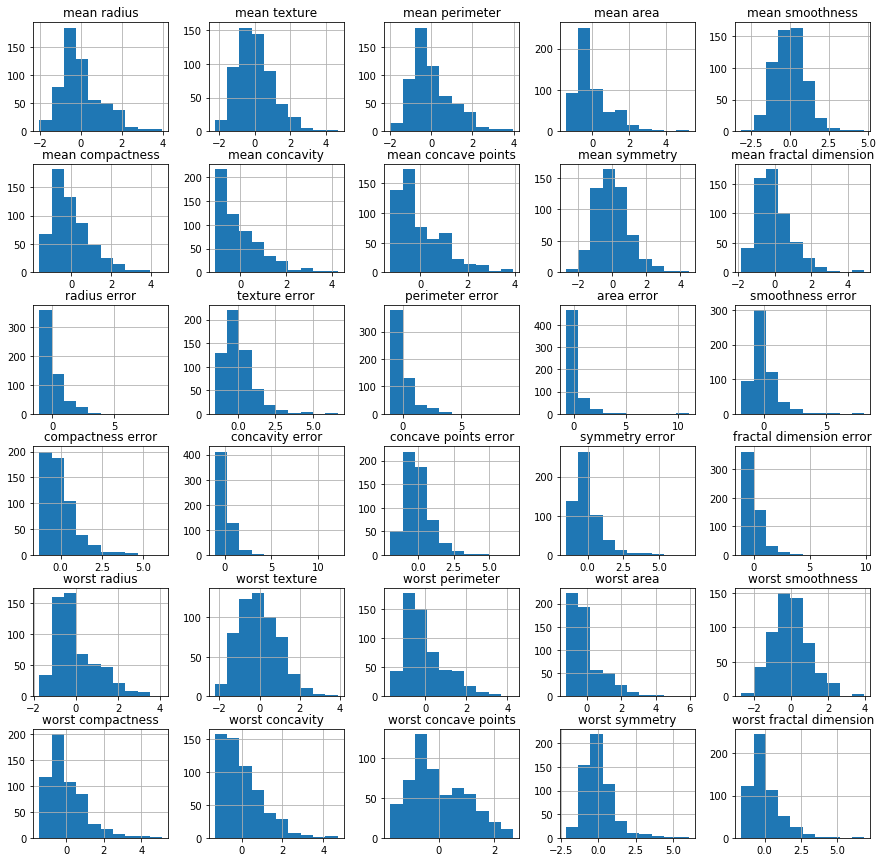

In [16]:
columns = tabla.columns
print(columns)
table_scaled = np.zeros(tabla.shape, dtype=np.float)
# vacia = np.empty((30,0))
for ic, column in enumerate(columns):
    column_values = tabla[column].values
    new_values = (column_values - means[ic]) / stds[ic]
    table_scaled[:, ic] = new_values
    # vacia = np.hstack((vacia, new_values))
tabla_escalada = pd.DataFrame(data=table_scaled, columns=columns)
_ = tabla_escalada.hist(figsize=(15, 15))

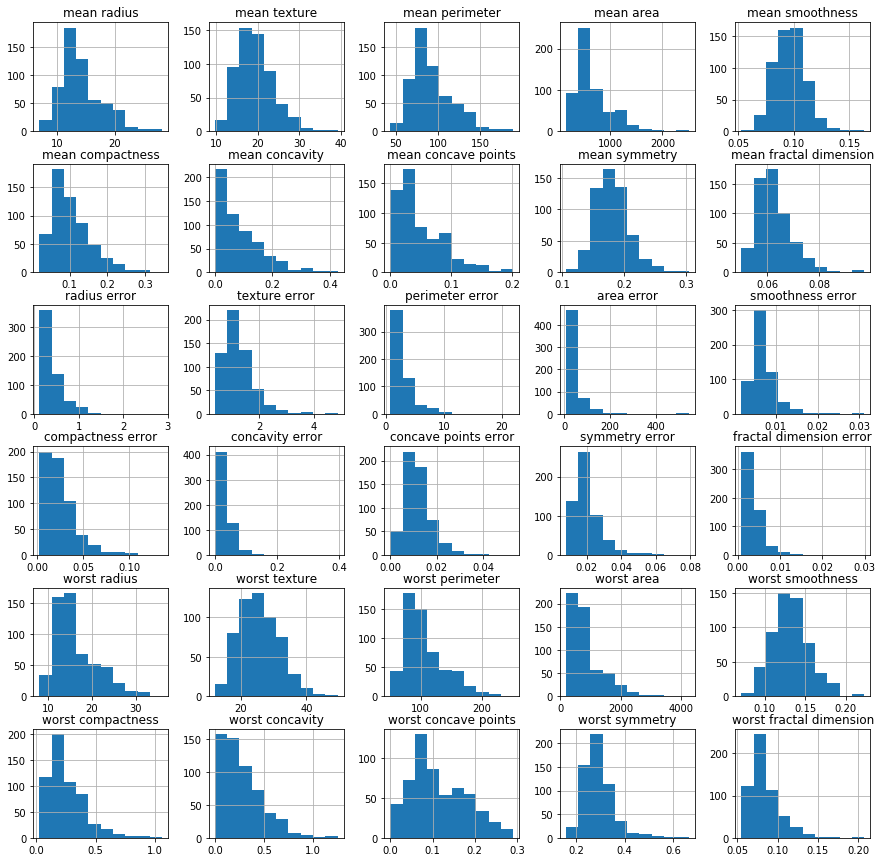

In [10]:
_ = tabla.hist(figsize=(15, 15))

In [17]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
tabla_sc = sc.fit_transform(tabla)
tabla_sc_pd = pd.DataFrame(data=tabla_sc, columns=columns)
_ = tabla_sc_pd.hist(figsize=(15, 15))

array([3.52095076e+00, 4.29725464e+00, 2.42776193e+01, 3.51604754e+02,
       1.40517641e-02, 5.27663291e-02, 7.96497253e-02, 3.87687325e-02,
       2.73901809e-02, 7.05415588e-03, 2.77068942e-01, 5.51163427e-01,
       2.02007710e+00, 4.54510134e+01, 2.99987837e-03, 1.78924359e-02,
       3.01595231e-02, 6.16486075e-03, 8.25910439e-03, 2.64374475e-03,
       4.82899258e+00, 6.14085432e+00, 3.35730016e+01, 5.68856459e+02,
       2.28123569e-02, 1.57198171e-01, 2.08440875e-01, 6.56745545e-02,
       6.18130785e-02, 1.80453893e-02])

$$ var(x) = \frac{\sum (x - \mu)^2}{N - 1} $$

$$ cov(x, y) = \sum (x-\mu_x) (y-\mu_y) $$

$$ corr(x, y) = \frac{cov(x, y)}{\sigma_x \sigma_y} $$

# Obtener transformación PCA

1 - Matriz de covarianzas (es una matriz simétrica)

2 - Obtener eigenvalores y eigenvectores de 1

3 - Ordenar los eigenvectores por magnitud de eigenvalores

4 - Construir matriz de transformacion PCA con eigenvectores ordenados

$$\lambda v = [cov]_{nxn} v \\
v \in R^n \\
T_{PCA} = [v1, v2, .. vn] \\
$$

$$[PCA]_{mxr}$$
- en donde m es el numero de columnas de X
- r es el numero de componentes principales seleccionados
$$X_{PCA} = [X] [PCA]$$
$$[X_{PCA}]_{nxr}$$
- n es el numero de observaciones o instancias
- r es el numero de componentes principales elegidas

In [18]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [ ]:
# X_pca[i, r0] = alpha * X[i, j0] + beta * X[i, j1] + ...
# X_pca[i, r1] = alpha' * X[i, j0] + beta' * X[i, j1] + ...

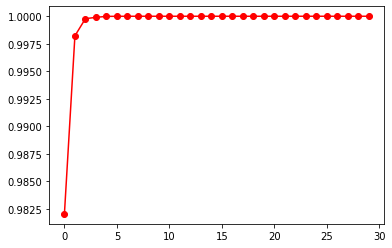

In [26]:
# representacion de varianza relativa para eigenvector
plt.plot(pca.explained_variance_ratio_.cumsum(), "ro-")
plt.show()

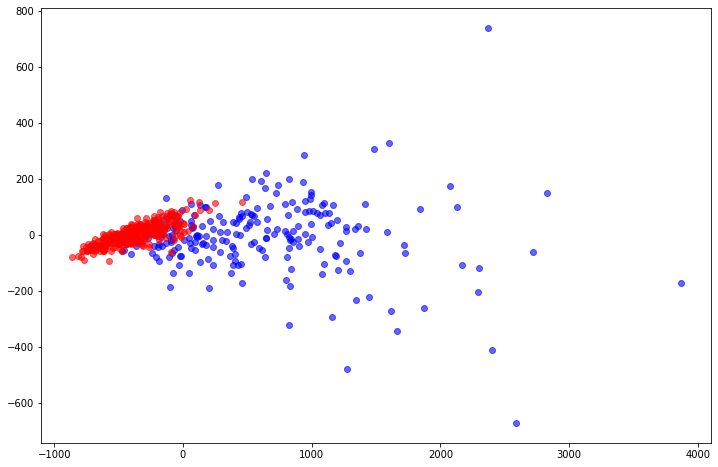

In [34]:
inds0 = y == 0
inds1 = y == 1
plt.figure(figsize=(12,8))
plt.scatter(X_pca[inds0, 0], X_pca[inds0, 1], c="b", alpha=0.6, label="c0")
plt.scatter(X_pca[inds1, 0], X_pca[inds1, 1], c="r", alpha=0.6, label="c1")
plt.show()

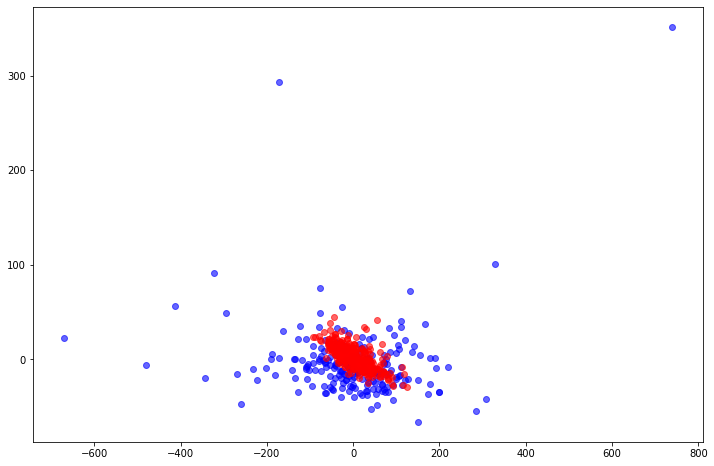

In [37]:
inds0 = y == 0
inds1 = y == 1
plt.figure(figsize=(12,8))
plt.scatter(X_pca[inds0, 1], X_pca[inds0, 2], c="b", alpha=0.6, label="c0")
plt.scatter(X_pca[inds1, 1], X_pca[inds1, 2], c="r", alpha=0.6, label="c1")
plt.show()

In [39]:
mat cov
cov_mat = np.cov(X)
# eigenvectores eigenvalores
np.linalg.eig

array([[163054.57898587, 168635.19411067, 148696.6517571 , ...,
         99737.41839631, 157883.1289841 ,  22991.93906415],
       [168635.19411067, 178207.5923937 , 157449.27075338, ...,
        106243.27500207, 167040.79725691,  24230.06772392],
       [148696.6517571 , 157449.27075338, 139188.84393261, ...,
         93993.16962706, 147648.28238289,  21440.18118139],
       ...,
       [ 99737.41839631, 106243.27500207,  93993.16962706, ...,
         63626.92698799,  99714.52288982,  14526.70328332],
       [157883.1289841 , 167040.79725691, 147648.28238289, ...,
         99714.52288982, 156658.66618122,  22786.15349178],
       [ 22991.93906415,  24230.06772392,  21440.18118139, ...,
         14526.70328332,  22786.15349178,   3397.6287007 ]])